In [124]:
import pandas as pd
import os
from collections import Counter
from sklearn.utils import shuffle
import pickle
import numpy as np
from sortedcontainers import SortedList

In [34]:
dir_name = "../large_files/archive"
rating_file_name = "rating.csv"

In [35]:
input_path = os.path.join(dir_name, rating_file_name)
df = pd.read_csv(input_path, usecols=lambda col: col != "timestamp")

In [30]:
df.userId = df.userId - 1

In [31]:
unique_movie_ids = set(df.movieId.values)

In [32]:
len(unique_movie_ids)

26744

In [27]:
df.head(5)

,userId,movieId,rating,movie_idx
0,0,2,3.5,2
1,0,29,3.5,29
2,0,32,3.5,32
3,0,47,3.5,47
4,0,50,3.5,50


In [36]:
movie2idx = {}
count = 0
for m_id in unique_movie_ids:
    movie2idx[m_id] = count
    count+=1

In [37]:
df['movie_idx'] = df.apply(lambda row: movie2idx[row.movieId], axis=1)

In [38]:
df.head(5)

,userId,movieId,rating,movie_idx
0,1,2,3.5,2
1,1,29,3.5,29
2,1,32,3.5,32
3,1,47,3.5,47
4,1,50,3.5,50


In [39]:
movie2idx

{np.int64(131072): 0,
 np.int64(1): 1,
 np.int64(2): 2,
 np.int64(3): 3,
 np.int64(4): 4,
 np.int64(5): 5,
 np.int64(6): 6,
 np.int64(7): 7,
 np.int64(8): 8,
 np.int64(9): 9,
 np.int64(10): 10,
 np.int64(11): 11,
 np.int64(12): 12,
 np.int64(13): 13,
 np.int64(14): 14,
 np.int64(15): 15,
 np.int64(16): 16,
 np.int64(17): 17,
 np.int64(18): 18,
 np.int64(19): 19,
 np.int64(20): 20,
 np.int64(21): 21,
 np.int64(22): 22,
 np.int64(23): 23,
 np.int64(24): 24,
 np.int64(25): 25,
 np.int64(26): 26,
 np.int64(27): 27,
 np.int64(28): 28,
 np.int64(29): 29,
 np.int64(30): 30,
 np.int64(31): 31,
 np.int64(32): 32,
 np.int64(33): 33,
 np.int64(34): 34,
 np.int64(35): 35,
 np.int64(36): 36,
 np.int64(37): 37,
 np.int64(38): 38,
 np.int64(39): 39,
 np.int64(40): 40,
 np.int64(41): 41,
 np.int64(42): 42,
 np.int64(43): 43,
 np.int64(44): 44,
 np.int64(45): 45,
 np.int64(46): 46,
 np.int64(47): 47,
 np.int64(48): 48,
 np.int64(49): 49,
 np.int64(50): 50,
 np.int64(51): 51,
 np.int64(52): 52,
 np.int6

In [40]:
edit_file_path = os.path.join(dir_name, "edited_rating.csv")
df.to_csv(edit_file_path)

### Shrinking Preprocess
* shrink data by selecting top users & top movies
* top users : users who rated most movies
* top movies : movies rated by most users

In [41]:
N = df.userId.max() + 1 # num users  
M = df.movie_idx.max() + 1 # num movies

In [ ]:
# No. of occcurrence of userId & movieId
user_id_counts = Counter(df.userId)
movie_id_counts = Counter(df.movie_idx)

In [ ]:
# Top no. of users & movies to keep
n = 10000
m = 2000

user_ids_subset = [u_id for u_id, _ in user_id_counts.most_common(n)]
movie_ids_subset = [m_id for m_id, _ in movie_id_counts.most_common(m)]

In [ ]:
subset_mask = df.userId.isin(user_ids_subset) & df.movie_idx.isin(movie_ids_subset)

# need copy to allow data to be overwritten in new df, else masking points to reference of existing df
df_subset = df[subset_mask].copy()

In [53]:
df_subset.isna().sum()

userId       0
movieId      0
rating       0
movie_idx    0
dtype: int64

In [50]:
df_subset.head(15)

,userId,movieId,rating,movie_idx
960,11,1,4.5,1
961,11,10,2.5,10
962,11,19,3.5,19
963,11,32,5.0,32
964,11,39,4.5,39
965,11,65,2.0,65
966,11,110,4.0,110
967,11,145,3.0,145
968,11,150,5.0,150
969,11,153,3.5,153


In [55]:
# remake userId & movieId to make it sequential (due to subsetting)
new_user_id_map = {}
new_movie_id_map = {}

i = 0
for oldId in user_ids_subset:
    new_user_id_map[oldId] = i
    i += 1

j = 0
for oldId in movie_ids_subset:
    new_movie_id_map[oldId] = j
    j += 1

In [56]:
# Set new Ids in df
df_subset.loc[:, 'userId'] = df_subset.apply(lambda row: new_user_id_map[row.userId], axis=1)
df_subset.loc[:, 'movie_idx'] = df_subset.apply(lambda row: new_movie_id_map[row.movie_idx], axis=1)

In [57]:
df_subset.head(5)

,userId,movieId,rating,movie_idx
960,7307,1,4.5,10
961,7307,10,2.5,68
962,7307,19,3.5,143
963,7307,32,5.0,19
964,7307,39,4.5,85


In [64]:
df_subset.userId.max()
df_subset.movie_idx.max()
df_subset.reset_index(drop=True, inplace=True)

In [65]:
df_subset.head(2)

,userId,movieId,rating,movie_idx
0,7307,1,4.5,10
1,7307,10,2.5,68


In [66]:
df_subset.to_csv(edit_file_path)

### df to dict
* Given user id, which movie_id they rated (as movie list)
* Given movie id, which user_id rated it (as user list)
* given (user_id, movie_id), what is the rating

* looping to find rating = O(set(ratings))

In [70]:
N = df_subset.userId.max() + 1
M = df_subset.movie_idx.max() + 1

In [76]:
# split into train-test
df_subset = shuffle(df_subset)
cutoff = int(0.8 * len(df_subset))

df_train = df_subset.iloc[:cutoff]
df_test = df_subset.iloc[cutoff:]

In [77]:
user2movie = {}
movie2user = {}
usermovie2rating = {}

In [ ]:
count = 0
def update_mappings(row):
    global count
    count += 1
    
    if count % 100000 == 0:
        print("processed: %.3f" % (float(count) / cutoff))
    
    rowUserId = int(row.userId)
    rowMovieId = int(row.movie_idx)

    if rowUserId not in user2movie:
        user2movie[rowUserId] = [rowMovieId]
    else:
        user2movie[rowUserId].append(rowMovieId)

    if rowMovieId not in movie2user:
        movie2user[rowMovieId] = [rowUserId]
    else:
        movie2user[rowMovieId].append(rowUserId)
    
    usermovie2rating[(rowUserId, rowMovieId)] = row.rating # every row defo different user & movi


In [81]:
usermovie2rating_test = {}
test_count = 0
def update_test_mappings(row):
    global test_count
    test_count += 1
    
    if test_count % 100000 == 0:
        print("processed: %.3f" % (float(test_count) / len(df_test)))
    
    rowUserId = int(row.userId)
    rowMovieId = int(row.movie_idx)
    
    usermovie2rating_test[(rowUserId, rowMovieId)] = row.rating # every row defo different user & movi

df_test.apply(update_test_mappings, axis=1)


processed: 0.093
processed: 0.185
processed: 0.278
processed: 0.371
processed: 0.464
processed: 0.556
processed: 0.649
processed: 0.742
processed: 0.835
processed: 0.927


4522120    None
1280055    None
1220062    None
4431444    None
1680708    None
           ... 
2973016    None
4845160    None
5129349    None
3331458    None
5142397    None
Length: 1078405, dtype: object

In [79]:
df_train.apply(update_mappings, axis=1) # apply df row to function, axis=1 means rows

processed: 0.023
processed: 0.046
processed: 0.070
processed: 0.093
processed: 0.116
processed: 0.139
processed: 0.162
processed: 0.185
processed: 0.209
processed: 0.232
processed: 0.255
processed: 0.278
processed: 0.301
processed: 0.325
processed: 0.348
processed: 0.371
processed: 0.394
processed: 0.417
processed: 0.440
processed: 0.464
processed: 0.487
processed: 0.510
processed: 0.533
processed: 0.556
processed: 0.580
processed: 0.603
processed: 0.626
processed: 0.649
processed: 0.672
processed: 0.695
processed: 0.719
processed: 0.742
processed: 0.765
processed: 0.788
processed: 0.811
processed: 0.835
processed: 0.858
processed: 0.881
processed: 0.904
processed: 0.927
processed: 0.950
processed: 0.974
processed: 0.997


5309640    None
4567295    None
3433971    None
1823736    None
2243845    None
           ... 
4408409    None
672        None
1685269    None
3695333    None
1288748    None
Length: 4313620, dtype: object

In [ ]:
# pickle save files in binary, not actually json due to keys being integers (not easy to parse in json)
with open('user2movie.json', 'wb') as f:
    pickle.dump(user2movie, f)

with open('movie2user.json', 'wb') as f:
    pickle.dump(movie2user, f)

with open('usermovie2rating.json', 'wb') as f:
    pickle.dump(usermovie2rating, f)

with open('usermovie2rating_test.json', 'wb') as f:
    pickle.dump(usermovie2rating_test, f)

### User-User Collab Filtering
* No ML involved, just statistical equations

In [100]:
set(df_train.userId.unique()) - set(df_test.userId.unique())

set()

##### Getting N users & M movies
- movies in test set may not be present in train set
- less likely to occur for user
- thus, get the max value between m1 & m2 

In [ ]:
N = np.max(list(user2movie.keys())) + 1


# test set may contain movies train set doesn't have data on
m1 = np.max(list(movie2user.keys())) # movie ids for train set
m2 = np.max([m_id for (u_id, m_id), rating in usermovie2rating_test.items()]) # movie ids for test set
M = max(m1, m2) + 1

##### Calculate Score between 2 users

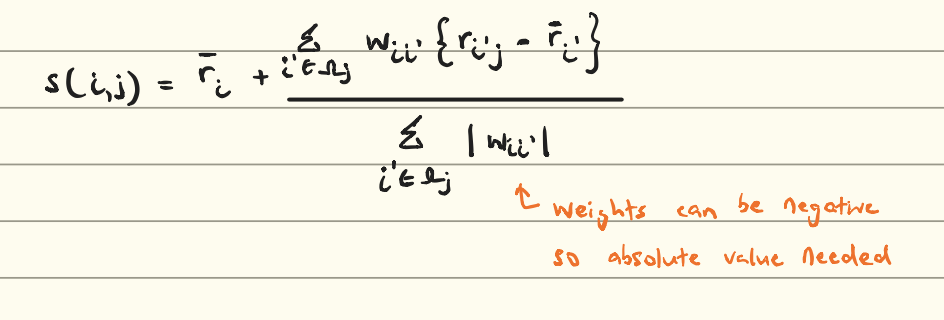

(i = user, j = movie)
* rBar = each user's average rating
* rhs: weighted deviation (i' = neighbours)
* deviation = user rating of a movie - user average rating

##### Calculate weights for all users

In [ ]:
with open('user2movie.json', 'rb') as f:
    user2movie = pickle.load(f)

with open('movie2user.json', 'rb') as f:
    movie2user = pickle.load(f)

with open('usermovie2rating.json', 'rb') as f:
    usermovie2rating = pickle.load(f)

with open('usermovie2rating_test.json', 'rb') as f:
    usermovie2rating_test = pickle.load(f)


K = 25 # No. of neighbours to consider
limit = 5 # min threshold of movies in common to perform score calc (speed up irrelevant calc)
neighbours = [] # store neighbours
averages = [] # store user average ratings
deviations = [] # store user deviations

for i in range(N):
    user_movie_ids = user2movie[i]
    unique_user_movie_ids = set(user_movie_ids)

    # get the ratings for each movie that current user rated
    ratings_i = { m_id: usermovie2rating[(i, m_id)] for m_id in user_movie_ids }
    avg_rating_i = np.mean(list(ratings_i.values()))
    
    # get deviation for each movie of current user
    dev_i = { m_id: (rating - avg_rating_i) for m_id, rating in ratings_i.items() }
    dev_i_values = np.array(list(dev_i.values()))

    sigma_i = np.sqrt(dev_i_values.dot(dev_i_values))

    averages.append(avg_rating_i)
    deviations.append(dev_i)

    sortedWeights = SortedList()
    for j in range(N):
        if j != i: # don't include self
            neighbour_movie_ids = user2movie[j]
            unique_neighbour_movie_ids = set(neighbour_movie_ids)

            common_movies = (unique_user_movie_ids & unique_neighbour_movie_ids) # intersection between sets
            if (len(common_movies) > limit): # only calc if more than threshold
                ratings_j = { m_id: usermovie2rating[(j, m_id)] for m_id in neighbour_movie_ids}
                avg_rating_j = np.mean(list(ratings_j.values()))
                dev_j = { m_id: (rating - avg_rating_j) for m_id, rating in ratings_j.items() }
                dev_j_values = np.array(list(dev_j.values()))
                sigma_j = np.sqrt(dev_j_values.dot(dev_j_values))
            
                # calc correlation coefficient
                numerator = sum(dev_i[m_id] * dev_j[m_id] for m_id in common_movies)
                w_ij = numerator / (sigma_i * sigma_j) # weights (aka pearson correl coef)

                # negate weight, list sorted ascendingly
                # pearson correl, larger values more correlated
                sortedWeights.add((-w_ij, j))
                if len(sortedWeights) > K:
                    del sortedWeights[-1]
    
    neighbours.append(sortedWeights)
    if i % 1 == 0:
        print(f"Processed {i}")





Processed 0
Processed 1
Processed 2
Processed 3
Processed 4
Processed 5
Processed 6
Processed 7
Processed 8
Processed 9
Processed 10
Processed 11
Processed 12
Processed 13
Processed 14
Processed 15
Processed 16
Processed 17
Processed 18
Processed 19
Processed 20
Processed 21
Processed 22
Processed 23
Processed 24
Processed 25
Processed 26
Processed 27
Processed 28
Processed 29
Processed 30
Processed 31
Processed 32
Processed 33
Processed 34
Processed 35
Processed 36
Processed 37
Processed 38
Processed 39
Processed 40
Processed 41
Processed 42
Processed 43
Processed 44
Processed 45
Processed 46
Processed 47
Processed 48
Processed 49
Processed 50
Processed 51
Processed 52
Processed 53
Processed 54
Processed 55
Processed 56
Processed 57
Processed 58
Processed 59
Processed 60
Processed 61
Processed 62
Processed 63
Processed 64
Processed 65
Processed 66
Processed 67
Processed 68
Processed 69
Processed 70
Processed 71
Processed 72
Processed 73
Processed 74
Processed 75
Processed 76
Processed

##### Set up formula for prediction

In [ ]:
# predicting the score (using score formula)
def predict(i, movieId):
    numerator = 0
    denominator = 0

    for neg_weight, j in neighbours[i]:
        try:
            numerator += -neg_weight * deviations[j][movieId] # sum up all weight * deviatios
            denominator += abs(neg_weight)

        except KeyError: # neighbour may not have same movie rated
            pass
    
    if denominator == 0:
        prediction = averages[i] # if denominator is 0 (no weights, then simply use average rating as score)
    else:
        prediction = numerator / denominator + averages[i]
    
    # Bound the prediction between 0.5 and 5 for rating
    prediction = min(5, prediction)
    prediction = max(0.5, prediction)
    return prediction

##### Perform actual prediction
- loop through ratings dictionary

In [ ]:
train_predictions = []
train_targets = []

for (i, m), target in usermovie2rating.items():
    prediction = predict(i, m)

    train_predictions.append(prediction)
    train_targets.append(target)


test_predictions = []
test_target = []

for (i, m), target in usermovie2rating_test.items():
    prediction = predict(i, m)
    test_predictions.append(prediction)
    test_target.append(target)


def mse(pred, target):
    pred = np.array(pred)
    target = np.array(target)
    return np.mean((pred - target) ** 2)

print("train mse: ", mse(train_predictions, train_targets))
print("train mse: ", mse(test_predictions, test_target))